# Exploratory Analysis of Heart Disease Data

## Goals 
The purpose of this preliminary analysis is to gain insight into this dataset by visualizing and summarizing it, as well as checking for any missing/repeat data, then exploring the relationships between the features and using that information to suggest possible feature engineering and modeling approaches, assuming the goal is a tractable model for the prediction of heart disease. Recommendations will be given at the end along with a rationale for their use.

In [54]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## About the Data
Factors of interest for coronary heart disease were recorded for a group of males in South Africa. This is a publically-available dataset courtesy of Rossouw et al., 1983, South African Medical Journal. The dataset consists of 463 observations on nine predictors, with the tenth column indicating whether the subject had or did not have (1/0) coronary heart disease. 

In [12]:
Heart_Data = pd.read_table("C:\\Users\\Zoe Haskell\\Desktop\\Machine Learning\\HeartDiseaseData.txt", sep=',')
Heart_Data.head() 
#Heart_Data.dtypes

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


First I'll be checking for the meaning, units (if available), and data types of each variable, then renaming the columns with more intuitive names where needed, and changing the data's format if it seems appropriate.

| Original Variable Name | Meaning | Data Type | New Variable Name | Notes |
| --- | --- | --- | --- | --- | 
| sbp | systolic blood pressure | int64 | Blood_Pressure_Sys |---|
|tobacco | accumulation of tobacco in the body in kilograms | float64 | Tobacco | --- |
| ldl | blood levels of low density lipoprotein cholesterol ("bad" cholesterol) | float64 | LDL_Cholesterol | --- |
| adiposity | percentage of fatty tissue in the body | float64 | Fatty_Tissue_Percent | --- |
| famhist | indicates whether the subject has a family history of heart disease (Present/Absent) | object | Family_History | change to an encoded categorical variable |
| typea | subject's score on a psychological test intended to measure "Type A" or stress-prone behavior | int64 | Type_A | ---|
| obesity | BMI of subject | float64 | Obesity | ---|
| alcohol | current alcohol consumption level | float64 | Alcohol_Intake | --- |
| age | subject's age | int64 | Age | --- |
| chd | binary indicator of coronary heart disease | int64 | Heart_Disease | --- |


In [20]:
Heart_Data.rename(columns = {'sbp': 'Blood_Pressure_Sys', 'tobacco': 'Tobacco', 'ldl':'LDL_Cholesterol', 'adiposity':'Fatty_Tissue_Percent', 'famhist':'Family_History', 'typea':'Type_A', 'obesity':'Obesity', 'alcohol':'Alcohol_Intake', 'age':'Age', 'chd':'Heart_Disease'}, inplace = True)
Heart_Data["Family_History"] = Heart_Data["Family_History"].astype('category').cat.codes
Heart_Data = Heart_Data.drop('row.names', axis = 1) # no point keeping these as an extra column; info already naturally in index
Heart_Data.head()

,Blood_Pressure_Sys,Tobacco,LDL_Cholesterol,Fatty_Tissue_Percent,Family_History,Type_A,Obesity,Alcohol_Intake,Age,Heart_Disease
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


## Check for Missing or Repeat Observations
If any data is missing, I'll check for the most appropriate method of handling that without introducing bias into the analysis (i.e., whether to do a complete-case analysis/drop all incomplete observations, or whether to "fill in" missing data using e.g. the Expectation-Maximization (EM) algorithm, or simpler methods like weighting or imputation).

Due to the nature of the data, in this context I'll delete duplicates; the probability that two distinct subjects had identical values for all measurements at the level of precision measured here is too small not to simply indicate a double-entry error.

I'm running through this phase before checking out summaries and visualizations of the dataset because these will be most useful if the dataset is already "clean".


In [24]:
print("Data Missing : ", Heart_Data.isnull().values.any())
Duplicates = Heart_Data[Heart_Data.duplicated()] 
print("Duplicate Rows :", Duplicates) 

Data Missing :  False
Duplicate Rows : Empty DataFrame
Columns: [Blood_Pressure_Sys, Tobacco, LDL_Cholesterol, Fatty_Tissue_Percent, Family_History, Type_A, Obesity, Alcohol_Intake, Age, Heart_Disease]
Index: []


In this case there are no incomplete or duplicated observations, so we can move ahead to summary and visualization.

## Summarize and Visualize Data
In this section I am getting a sense for the centers, spreads and correlations of the variables and how much they 'explain' the variance in heart disease cases. If the data were higher-dimensional, pairwise scatterplots would quickly not be worth examining, but the corrolation plot and e.g. PCA would still be useful metrics for understanding the correlation structure of the dataset. 

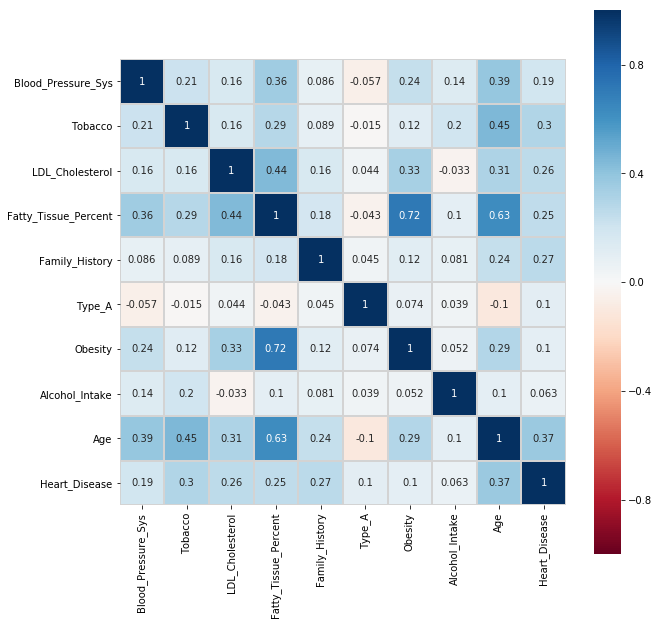

In [55]:
# Find the correlation matrix
corr = Heart_Data.corr()

# Draw a heatmap of corr
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, cmap=plt.cm.RdBu, vmin=-1, vmax=1,
            square=True, annot = True, linecolor="lightgray", linewidths=1, ax=ax)
ax.axis("on")
plt.show()


### Notes on the Corrolation Plot
Unsurprisingly, we see a high corrolation between Obesity and Fatty_Tissue_Percent; sometimes when this happens we will later benefit from removing one of these variables from the model, as one could be thought of as a rough stand-in for the other, and including fewer predictors can help us avoid overfitting problems.

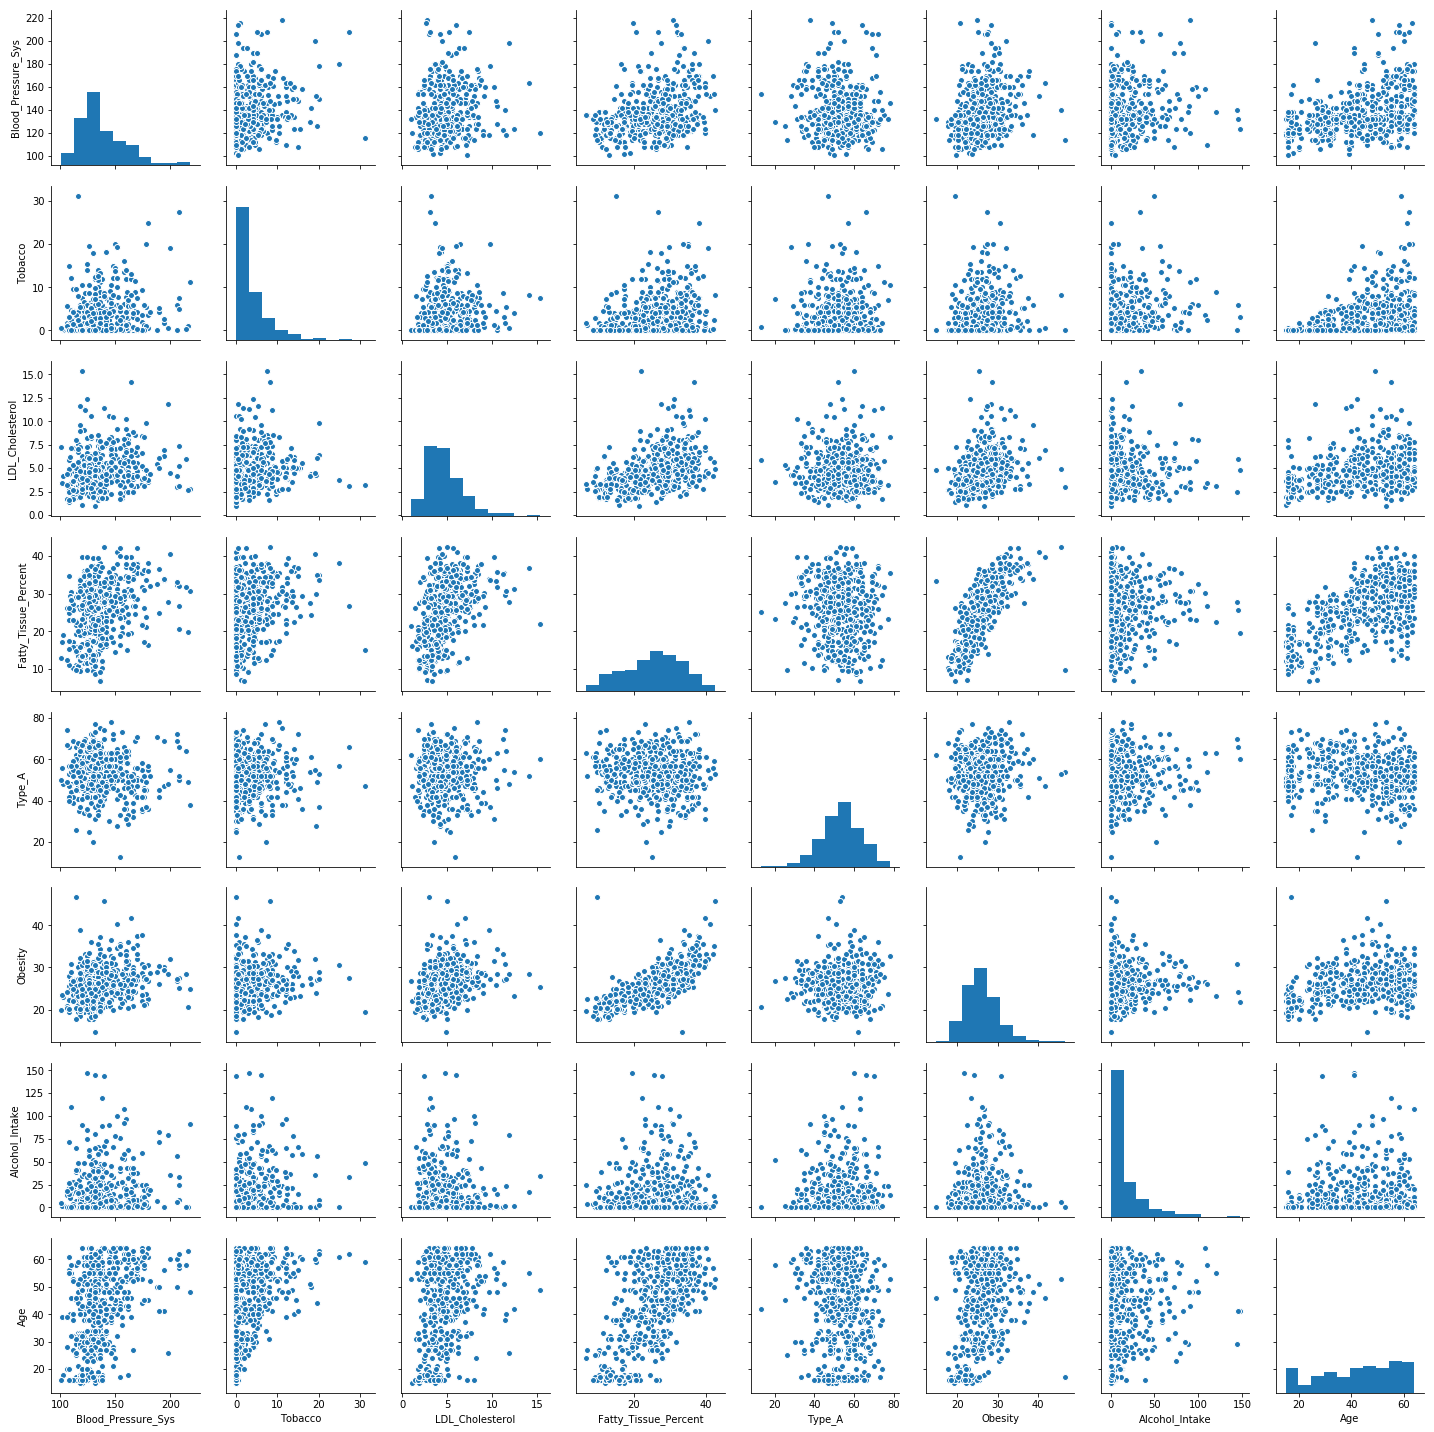

In [48]:
Binary_Columns = ["Family_History", "Heart_Disease"]
Binary_Data = Heart_Data[Binary_Columns]
Continuous_Data = Heart_Data.drop(Binary_Columns, axis = 1)

Variable_Pairs = sns.pairplot(Continuous_Data)
    

### Notes on the Pairplots
The histograms along the diagonal show a couple more symmetric distributions (Type_A, Fatty_Tissue_Percent), several distributions with positive/right skew (Alcohol_Intake, Obesity, LDL_Cholesterol, Tobacco, Blood_Pressure_Sys) and one that looks roughly uniform (Age). 

The correlation plot above already gave a sense for how these variables are related to one another, so I'm only using the scatterplots to see if there are any strange-looking cases that may be errors. 

For example, note the scatterplot for Obesity vs. Fatty_Tissue_Percent: as we'd expect, there's a tight clustering of data, but there are two points which stand out, one above and one below that cluster. Looking at the high-BMI and low-fatty tissue case, we see the subject has very low alcohol consumption, low cholesterol, low tobacco use, and a low age. This does not look like an error -- rather this seems representative of a subset of the population which is rare but real: e.g. athletes with high BMI but otherwise good health.

After doing similar "common sense" checks for other standout cases in the data, I chose not to remove any of them; I see no evidence that any of them are measurement errors. Note I am not referring to these as "outliers", because identifying multivariate outliers is more technically-involved and there doesn't seem to be a need to do it here. If this were data where outlier detection was necessary, I'd start with the method proposed by Kamalov and Leung (2020), due to its simplicity and performance relative to benchmarks. 

The scatterplots above also leave out our categorical variables, Family_History and Heart_Disease. To get some insight into those, I'll draw a series of boxplots.

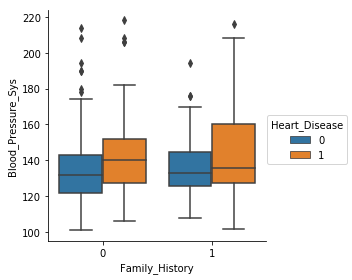

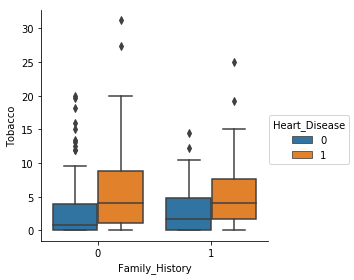

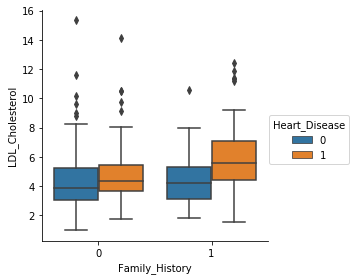

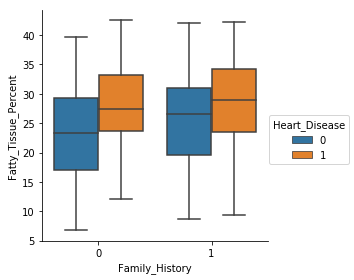

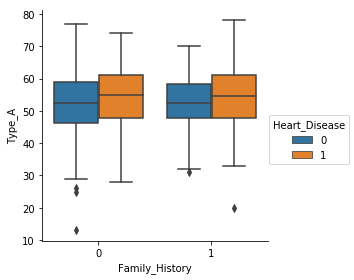

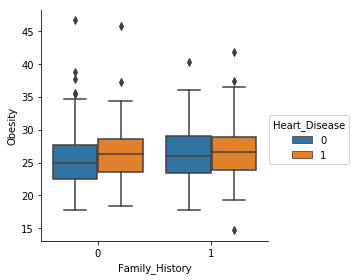

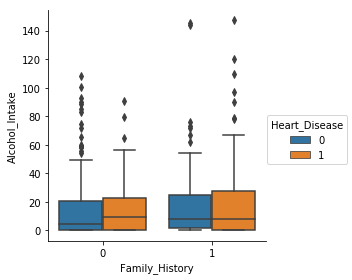

In [163]:
# Create a series of boxplots showing how our categorical variable Family_History relates 
# to the other variables, and how it relates to heart disease.
#fig, ax = plt.subplots(nrows = 7, ncols = 1)
for j in range(7):
    continuous_variable = Continuous_Data.columns[j]
    ax[j] = sns.factorplot("Family_History", continuous_variable, "Heart_Disease", data = Heart_Data, kind = 'box')


### Notes on the Factor Plots
Some insight we can gain by checking out these plots: average tobacco use and fatty tissue percentage were higher for the heart disease group **regardless** of family history.

Alcohol intake and Type A personality traits didn't vary widely with presence/absence of heart disease, **regardless** of family history.

The presence of high cholesterol, however, had a different distribution **if** a family history of heart disease was also present. So from this we could say that, for example, a model which kept family history but not cholesterol or vice-versa would be losing valuable information. Conditional relationships between variables like this also lends itself well to tree-based modeling approaches, like binary classification trees/forests.

## Feature Selection/Engineering
For simpler models which are less inclined to overfit, it's worth checking whether we can remove some variables from the data, or use transformations of our variables. As a starting way to assess this, I'll be using PCA (Principal Component Analysis). This is also another way to visualize and summarize the dataset, since I'll be projecting the data onto the 3D space spanned by the first three principal components in the plot below.

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Scale data first; otherwise high-variance features will be overweighted
Scaled_Features = StandardScaler().fit_transform(Continuous_Data)
# Separate out our target vector
Heart_Disease = Heart_Data[["Heart_Disease"]]
# PCA on the first four components
pca = PCA(n_components=4)
pca.fit(Scaled_Features)

PCA_Data = pd.DataFrame(data = np.transpose(pca.components_), columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
display(PCA_Data)


,PC 1,PC 2,PC 3,PC 4
0,0.333668,0.238534,-0.070633,-0.299715
1,0.309586,0.458580,0.096235,0.584819
2,0.337173,-0.363917,-0.014412,0.303958
3,0.527753,-0.187406,-0.034407,-0.157912
4,-0.024248,-0.282611,0.830983,0.265589
5,0.412804,-0.391710,0.120532,-0.372191
6,0.120336,0.542817,0.504180,-0.428926
7,0.463829,0.193114,-0.158429,0.240396


In [74]:
print("Percentage of Variation Explained by each PC:", pca.explained_variance_ratio_)

Percentage of Variation Explained by each PC: [0.35130074 0.14964143 0.13230941 0.10604509]


### Notes on PCA
We can see from the output above that the first four principal components account for ~ 73.8% of the variation in the data. To visualize how the first three components may be separating our classes, we'll plot the projection of our data onto them below. 

Note also that the loadings of the principal components give us insight into the relative importance of the features; if, for example, one feature consistently had loadings near zero, it would be a good sign that it could be removed from our modeling steps without much effect on predictive power. Similarly, if we saw PCs with a few very high loadings, we could infer which combinations of features are most relevant to our problem, some of which may even point to latent variables. In this case, we don't see anything that dramatic, but instead we see variance that is spread out more evenly across many features, indicating a "cumulative effect" of features rather than very few stand-out features.

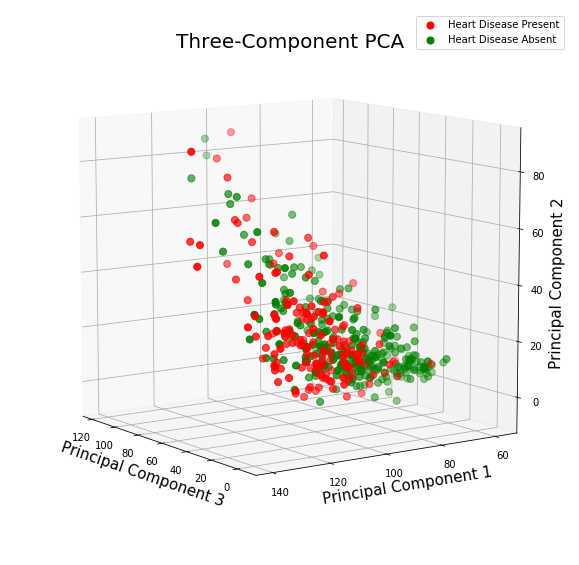

In [145]:
from mpl_toolkits import *
# Take first three components only
First_Three_PCs = PCA_Data[['PC 1', 'PC 2', 'PC 3']]
PC_tuples = list(First_Three_PCs.itertuples(index=False))
# Project data onto 3D space
New_Projection = Continuous_Data @ PC_tuples
For_Visualization = pd.concat([New_Projection , Heart_Disease], axis = 1)
For_Visualization.columns = ['PC 1', 'PC 2', 'PC 3','Heart Disease']

# Plot, label and colorcode
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_zlabel('Principal Component 2', fontsize = 15)
ax.set_title('Three-Component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = For_Visualization['Heart Disease'] == target
    ax.scatter(For_Visualization.loc[indicesToKeep, 'PC 3']
               , For_Visualization.loc[indicesToKeep, 'PC 1']
               , For_Visualization.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(['Heart Disease Present', 'Heart Disease Absent'])
ax.grid()
ax.view_init(10, 145)


### Notes on the Plot
Although our disease and non-disease classes still show a lot of overlap in this 3D projection, there is a sense of a 'red side' and a 'green side', indicating that the classes may be even more separable in higher dimensions, and that the use of e.g. a support vector machine approach might be called for.

## Model Recommendations
Given the results above, I would want to try out an SVM and test out its performance using cross-validation. I'd note though that I've had scalability issues before with SVMs in terms of runtime, so I'd start with two other, faster approaches first and see how they do before risking a time-hungry strategy.

One natural model for data like this is logistic regression. I'd prevent overfit by using a reduced model (via Bayesian Information Criterion or by using only a few of the Principal Components) and using cross-validation to determine its performance. 

Depending on the performance of a reduced logistic model, we could also explore the use of a binary classification tree. To avoid overfit in this case, we limit the number of generations available to the tree, code up a bagging model (ensemble the 'votes' of many trees), and use cross-validation. The last two approaches are inexpensive in terms of construction and computing time, and they both produce models which are relatively easy to interpret, especially for a lower-dimensional case like this.